In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from keras.models import Sequential
import tqdm.notebook as tq
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout,MaxPooling2D,Activation, BatchNormalization, Flatten, Dense, Rescaling, Resizing, Input, GlobalAvgPool2D,GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import pickle
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
def load_data(datasets, IMAGE_SIZE=(140, 140)):
  class_names = []
  for dataset in datasets:
    images=[]
    labels=[]
    print("tai len {} voi image size: {}".format(dataset, IMAGE_SIZE))
    step=0
    for folder in os.listdir(dataset):
      n=0
      if folder == '.ipynb_checkpoints':
        continue
      print("doc thu muc", str(folder),":")
      for file in tq.tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path=os.path.join(os.path.join(dataset, folder),file)
        if img_path.split('.')[-1] !='jpg':
          continue
        image = cv2.imread(img_path)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, IMAGE_SIZE)
        images.append(image)
        labels.append(step)
      step+=1
      class_names.append(str(folder))
    images=np.array(images, dtype='float32')
    labels=np.array(labels, dtype='int32')
  return images, labels, class_names

In [ ]:
images, labels, class_names=load_data(['/content/drive/MyDrive/Data_KLTN_Final'])
print("class names: ",class_names)

tai len /content/drive/MyDrive/Data_KLTN_Final voi image size: (140, 140)
doc thu muc Bảo tàng Chiến dịch Hồ Chí Minh :


  0%|          | 0/227 [00:00<?, ?it/s]

doc thu muc Bưu Điện HCM :


  0%|          | 0/158 [00:00<?, ?it/s]

doc thu muc Bảo Tàng Tranh 3D Art In Us :


  0%|          | 0/254 [00:00<?, ?it/s]

doc thu muc BiTexco :


  0%|          | 0/113 [00:00<?, ?it/s]

doc thu muc Bến Cảng Nhà Rồng :


  0%|          | 0/136 [00:00<?, ?it/s]

doc thu muc Bảo tàng Chứng tích Chiến tranh TPHCM :


  0%|          | 0/302 [00:00<?, ?it/s]

doc thu muc Bảo Tàng Mỹ Thuật TPHCM :


  0%|          | 0/165 [00:00<?, ?it/s]

doc thu muc Bảo tàng Phụ Nữ Nam Bộ :


  0%|          | 0/113 [00:00<?, ?it/s]

doc thu muc Bảo tàng Thành phố Hồ Chí Minh :


  0%|          | 0/168 [00:00<?, ?it/s]

doc thu muc Bảo Tàng Lịch Sử VN TPHCM :


  0%|          | 0/374 [00:00<?, ?it/s]

doc thu muc Chùa Bửu Long :


  0%|          | 0/255 [00:00<?, ?it/s]

doc thu muc Chùa Hoằng Pháp :


  0%|          | 0/298 [00:00<?, ?it/s]

doc thu muc Chùa Pháp Bửu :


  0%|          | 0/297 [00:00<?, ?it/s]

doc thu muc chùa ngọc hoàng :


  0%|          | 0/164 [00:00<?, ?it/s]

doc thu muc Chùa Quốc Tự :


  0%|          | 0/170 [00:00<?, ?it/s]

doc thu muc Chùa Chantarangsay(Chùa Khmer) :


  0%|          | 0/256 [00:00<?, ?it/s]

doc thu muc Bến tàu Bạch Đằng :


  0%|          | 0/187 [00:00<?, ?it/s]

doc thu muc Chùa Huê Nghiêm Q2 :


  0%|          | 0/247 [00:00<?, ?it/s]

doc thu muc Chùa Bà Thiên Hậu Sài Gòn :


  0%|          | 0/338 [00:00<?, ?it/s]

doc thu muc Chợ Đêm Hạnh Thông Tây :


  0%|          | 0/309 [00:00<?, ?it/s]

doc thu muc Chợ Tân Định :


  0%|          | 0/152 [00:00<?, ?it/s]

doc thu muc Chùa Ông Bổn :


  0%|          | 0/186 [00:00<?, ?it/s]

doc thu muc Chợ Lớn (Chợ Bình Tây) :


  0%|          | 0/302 [00:00<?, ?it/s]

doc thu muc Chợ bà chiểu :


  0%|          | 0/106 [00:00<?, ?it/s]

doc thu muc Chùa Ấn Quang :


  0%|          | 0/164 [00:00<?, ?it/s]

doc thu muc Chợ Bến Thành :


  0%|          | 0/358 [00:00<?, ?it/s]

doc thu muc Chợ Kim Biên :


  0%|          | 0/106 [00:00<?, ?it/s]

doc thu muc Công viên giải trí Đầm Sen :


  0%|          | 0/215 [00:00<?, ?it/s]

doc thu muc Chùa Vạn Đức :


  0%|          | 0/211 [00:00<?, ?it/s]

doc thu muc công viên Vinhomes Central Park :


  0%|          | 0/304 [00:00<?, ?it/s]

doc thu muc Công Viên Suối Tiên :


  0%|          | 0/108 [00:00<?, ?it/s]

doc thu muc Dinh Độc Lập :


  0%|          | 0/112 [00:00<?, ?it/s]

doc thu muc công viên thỏ trắng :


  0%|          | 0/111 [00:00<?, ?it/s]

doc thu muc Hồ Con Rùa TPHCM :


  0%|          | 0/237 [00:00<?, ?it/s]

doc thu muc Landmark 81 :


  0%|          | 0/105 [00:00<?, ?it/s]

doc thu muc Cầu Ánh Sao Sài Gòn :


  0%|          | 0/150 [00:00<?, ?it/s]

doc thu muc Hẻm Bia Lost in HongKong :


  0%|          | 0/144 [00:00<?, ?it/s]

doc thu muc Pháp Viện Minh Đăng Quang :


  0%|          | 0/185 [00:00<?, ?it/s]

doc thu muc nhà thờ hạnh thông tây :


  0%|          | 0/131 [00:00<?, ?it/s]

doc thu muc Phù Châu Miếu (Miếu Nổi) :


  0%|          | 0/160 [00:00<?, ?it/s]

doc thu muc Nhà Thờ Tân Định :


  0%|          | 0/220 [00:00<?, ?it/s]

doc thu muc Nhà Thờ Cha Tam :


  0%|          | 0/192 [00:00<?, ?it/s]

doc thu muc Nowzone Fashion Mall Shopping Center :


  0%|          | 0/60 [00:00<?, ?it/s]

doc thu muc Nhà thờ Huyện Sĩ :


  0%|          | 0/249 [00:00<?, ?it/s]

doc thu muc Nhà thờ Chợ Quán :


  0%|          | 0/246 [00:00<?, ?it/s]

doc thu muc Nhà Thờ Đức Bà :


  0%|          | 0/205 [00:00<?, ?it/s]

doc thu muc Nhà Hát TPHCM :


  0%|          | 0/112 [00:00<?, ?it/s]

doc thu muc Đền Mariamman :


  0%|          | 0/110 [00:00<?, ?it/s]

doc thu muc Thảo Cầm Viên SG :


  0%|          | 0/246 [00:00<?, ?it/s]

doc thu muc Phố Tây Bùi Viện TPHCM :


  0%|          | 0/102 [00:00<?, ?it/s]

doc thu muc Đài tưởng niệm Bồ tát Thích Quảng Đức :


  0%|          | 0/129 [00:00<?, ?it/s]

doc thu muc Tu Viện Khánh An :


  0%|          | 0/245 [00:00<?, ?it/s]

doc thu muc Đền Tưởng Niệm Bến Dược :


  0%|          | 0/264 [00:00<?, ?it/s]

doc thu muc Địa đạo Củ Chi :


  0%|          | 0/338 [00:00<?, ?it/s]

doc thu muc Công viên đá Nhật Rinrin Park :


  0%|          | 0/467 [00:00<?, ?it/s]

doc thu muc Đường sách Nguyên Văn Bình :


  0%|          | 0/432 [00:00<?, ?it/s]

doc thu muc Áo Dài Exhibition :


  0%|          | 0/418 [00:00<?, ?it/s]

doc thu muc Tu Viện VĨNH NGHIÊM :


  0%|          | 0/417 [00:00<?, ?it/s]

doc thu muc Chùa Một Cột Thủ Đức :


  0%|          | 0/413 [00:00<?, ?it/s]

doc thu muc Phố Đi Bộ Nguyễn Huệ :


  0%|          | 0/408 [00:00<?, ?it/s]

class names:  ['Bảo tàng Chiến dịch Hồ Chí Minh', 'Bưu Điện HCM', 'Bảo Tàng Tranh 3D Art In Us', 'BiTexco', 'Bến Cảng Nhà Rồng', 'Bảo tàng Chứng tích Chiến tranh TPHCM', 'Bảo Tàng Mỹ Thuật TPHCM', 'Bảo tàng Phụ Nữ Nam Bộ', 'Bảo tàng Thành phố Hồ Chí Minh', 'Bảo Tàng Lịch Sử VN TPHCM', 'Chùa Bửu Long', 'Chùa Hoằng Pháp', 'Chùa Pháp Bửu', 'chùa ngọc hoàng', 'Chùa Quốc Tự', 'Chùa Chantarangsay(Chùa Khmer)', 'Bến tàu Bạch Đằng', 'Chùa Huê Nghiêm Q2', 'Chùa Bà Thiên Hậu Sài Gòn', 'Chợ Đêm Hạnh Thông Tây', 'Chợ Tân Định', 'Chùa Ông Bổn', 'Chợ Lớn (Chợ Bình Tây)', 'Chợ bà chiểu', 'Chùa Ấn Quang', 'Chợ Bến Thành', 'Chợ Kim Biên', 'Công viên giải trí Đầm Sen', 'Chùa Vạn Đức', 'công viên Vinhomes Central Park', 'Công Viên Suối Tiên', 'Dinh Độc Lập', 'công viên thỏ trắng', 'Hồ Con Rùa TPHCM', 'Landmark 81', 'Cầu Ánh Sao Sài Gòn', 'Hẻm Bia

In [ ]:
# with open('/content/drive/MyDrive/Data_HoanChinh_KLTN/data_KLTN.pkl','wb') as f:
#   pickle.dump([images,labels],f)

In [ ]:
class_names = ['Bảo tàng Chiến dịch Hồ Chí Minh', 'Bưu Điện HCM', 'Bảo Tàng Tranh 3D Art In Us', 'BiTexco', 'Bến Cảng Nhà Rồng', 'Bảo tàng Chứng tích Chiến tranh TPHCM', 'Bảo Tàng Mỹ Thuật TPHCM', 'Bảo tàng Phụ Nữ Nam Bộ', 'Bảo tàng Thành phố Hồ Chí Minh', 'Bảo Tàng Lịch Sử VN TPHCM', 'Chùa Bửu Long', 'Chùa Hoằng Pháp', 'Chùa Pháp Bửu', 'chùa ngọc hoàng', 'Chùa Quốc Tự', 'Chùa Chantarangsay(Chùa Khmer)', 'Bến tàu Bạch Đằng', 'Chùa Huê Nghiêm Q2', 'Chùa Bà Thiên Hậu Sài Gòn', 'Chợ Đêm Hạnh Thông Tây', 'Chợ Tân Định', 'Chùa Ông Bổn', 'Chợ Lớn (Chợ Bình Tây)', 'Chợ bà chiểu', 'Chùa Ấn Quang', 'Chợ Bến Thành', 'Chợ Kim Biên', 'Công viên giải trí Đầm Sen', 'Chùa Vạn Đức', 'công viên Vinhomes Central Park', 'Công Viên Suối Tiên', 'Dinh Độc Lập', 'công viên thỏ trắng', 'Hồ Con Rùa TPHCM', 'Landmark 81', 'Cầu Ánh Sao Sài Gòn', 'Hẻm Bia Lost in HongKong', 'Pháp Viện Minh Đăng Quang', 'nhà thờ hạnh thông tây', 'Phù Châu Miếu (Miếu Nổi)', 'Nhà Thờ Tân Định', 'Nhà Thờ Cha Tam', 'Nowzone Fashion Mall Shopping Center', 'Nhà thờ Huyện Sĩ', 'Nhà thờ Chợ Quán', 'Nhà Thờ Đức Bà', 'Nhà Hát TPHCM', 'Đền Mariamman', 'Thảo Cầm Viên SG', 'Phố Tây Bùi Viện TPHCM', 'Đài tưởng niệm Bồ tát Thích Quảng Đức', 'Tu Viện Khánh An', 'Đền Tưởng Niệm Bến Dược', 'Địa đạo Củ Chi', 'Công viên đá Nhật Rinrin Park', 'Đường sách Nguyên Văn Bình', 'Áo Dài Exhibition', 'Tu Viện VĨNH NGHIÊM', 'Chùa Một Cột Thủ Đức', 'Phố Đi Bộ Nguyễn Huệ']
with open('/content/drive/MyDrive/Data_HoanChinh_KLTN/data_Agu_KLTN.pkl', 'rb') as f:
  images, labels = pickle.load(f)


In [ ]:
len(class_names)

60

In [ ]:
len(images)

14846

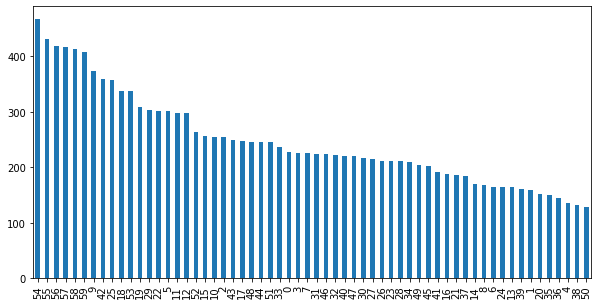

In [ ]:
import matplotlib.pyplot as plt
pd.Series(labels).value_counts().plot.bar(figsize = (10,5))

In [ ]:
from keras.models import Sequential
tf.random.set_seed(18)
data_augmentation=tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.25),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.15)
])
def data_Aug(images, labels, classes):
  list_img=[]
  list_label=[]
  for i, img in enumerate(images):
    if (labels[i] in classes):
      for j in range(1):
        image=data_augmentation(img)
        list_img.append(image)
        list_label.append(labels[i])
  images=np.append(images, list_img, axis=0)
  labels=np.append(labels, list_label, axis=0)
  return images, labels
print("truoc:", len(images),",", len(labels))
data_images_Aug, data_labels_Aug=data_Aug(images, labels, classes=[7,3,31,46,32,47,30,23,26,34,49])
print("sau:", len(data_images_Aug),",", len(data_labels_Aug))

truoc: 13648 , 13648
sau: 14846 , 14846


In [ ]:
with open('/content/drive/MyDrive/Data_HoanChinh_KLTN/data_Agu_KLTN.pkl','wb') as f:
  pickle.dump([data_images_Aug,data_labels_Aug],f)

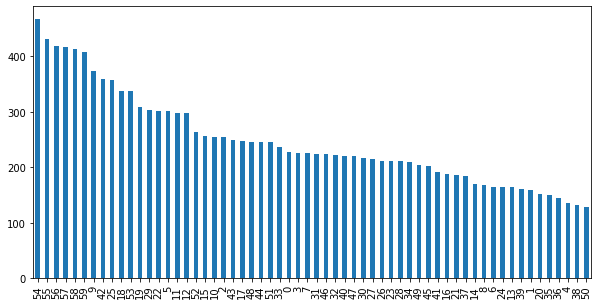

In [ ]:
pd.Series(data_labels_Aug).value_counts().plot(kind='bar', figsize = (10,5))

In [ ]:
from keras.utils.np_utils import to_categorical
labels=to_categorical(labels, num_classes=len(class_names))
images=images/255.0

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels,  test_size = 0.1, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)

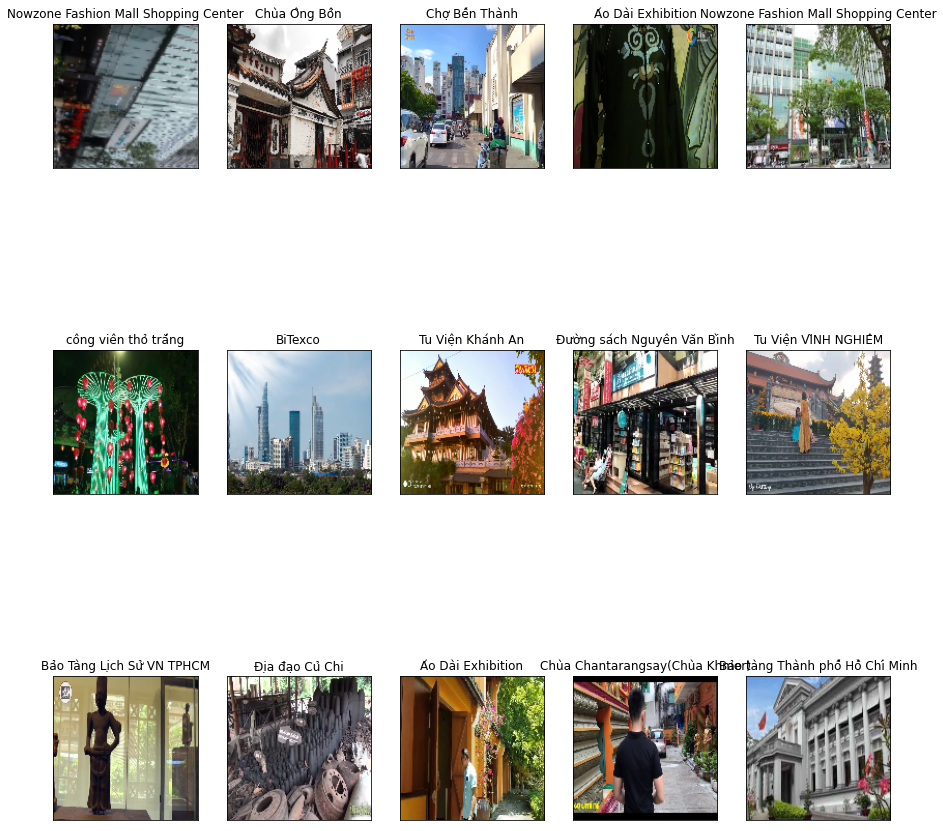

In [ ]:
import matplotlib.pyplot as plt
fig, axes=plt.subplots(3,5,figsize=(15,17))
for i,ax in enumerate(axes.flat):
  i+=100
  img=train_images[i]
  label=class_names[np.argmax(train_labels[i])]
  ax.set_title(str(label))
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])

In [ ]:
print("class names: ",class_names)
print("Kích thước tập train: ",len(train_images), "ảnh")
print("Kích thước tập test: ",len(test_images), "ảnh")
print("Kích thước tập validation: ",len(val_images), "ảnh")
print("Kích thước tập train: ",train_images.shape)
print("Kích thước tập test: ",test_images.shape)
print("Kích thước tập validation: ",val_images.shape)
print("Kích thước tập train label: ",train_labels.shape)
print("Kích thước tập test label: ",test_labels.shape)
print("Kích thước tập validation label: ",val_labels.shape)

class names:  ['Bảo tàng Chiến dịch Hồ Chí Minh', 'Bưu Điện HCM', 'Bảo Tàng Tranh 3D Art In Us', 'BiTexco', 'Bến Cảng Nhà Rồng', 'Bảo tàng Chứng tích Chiến tranh TPHCM', 'Bảo Tàng Mỹ Thuật TPHCM', 'Bảo tàng Phụ Nữ Nam Bộ', 'Bảo tàng Thành phố Hồ Chí Minh', 'Bảo Tàng Lịch Sử VN TPHCM', 'Chùa Bửu Long', 'Chùa Hoằng Pháp', 'Chùa Pháp Bửu', 'chùa ngọc hoàng', 'Chùa Quốc Tự', 'Chùa Chantarangsay(Chùa Khmer)', 'Bến tàu Bạch Đằng', 'Chùa Huê Nghiêm Q2', 'Chùa Bà Thiên Hậu Sài Gòn', 'Chợ Đêm Hạnh Thông Tây', 'Chợ Tân Định', 'Chùa Ông Bổn', 'Chợ Lớn (Chợ Bình Tây)', 'Chợ bà chiểu', 'Chùa Ấn Quang', 'Chợ Bến Thành', 'Chợ Kim Biên', 'Công viên giải trí Đầm Sen', 'Chùa Vạn Đức', 'công viên Vinhomes Central Park', 'Công Viên Suối Tiên', 'Dinh Độc Lập', 'công viên thỏ trắng', 'Hồ Con Rùa TPHCM', 'Landmark 81', 'Cầu Ánh Sao Sài Gòn', 'Hẻm Bia

In [ ]:
def ve_Acc_Loss(history):
 
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['loss','val_loss'])
  plt.show()

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['accuracy','val_accuracy'])
  plt.tight_layout()
  plt.show()

# **mobilenet**

In [ ]:
base_model_mobilebet = tf.keras.applications.MobileNet(input_shape=(140, 140,3), include_top=False, weights="imagenet")
for layer in base_model_mobilebet.layers[:]:
  layer.trainable = True
x = base_model_mobilebet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 
x = Dense(len(class_names), activation='softmax')(x) 
finetune_mobilenet = Model(inputs=base_model_mobilebet.input, outputs=x)
feature_model_mobilenet = finetune_mobilenet.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])
finetune_mobilenet.optimizer.learning_rate = 0.0001
finetune_mobilenet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140, 140, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 70, 70, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 70, 70, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 70, 70, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 70, 70, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 70, 70, 32)       128       
 ation)                                                      

In [ ]:

history_model_mobilenet = finetune_mobilenet.fit(train_images,train_labels , validation_data=(val_images, val_labels) , batch_size=64, epochs=100, shuffle=True)

Epoch 1/100
188/188 [==============================] - 68s 276ms/step - loss: 3.8141 - acc: 0.1399 - val_loss: 2.7081 - val_acc: 0.3321
Epoch 2/100
188/188 [==============================] - 47s 251ms/step - loss: 2.2717 - acc: 0.4312 - val_loss: 1.6977 - val_acc: 0.5984
Epoch 3/100
188/188 [==============================] - 47s 250ms/step - loss: 1.4719 - acc: 0.6210 - val_loss: 1.2844 - val_acc: 0.6754
Epoch 4/100
188/188 [==============================] - 47s 251ms/step - loss: 0.9910 - acc: 0.7409 - val_loss: 1.0691 - val_acc: 0.7277
Epoch 5/100
188/188 [==============================] - 47s 250ms/step - loss: 0.7130 - acc: 0.8143 - val_loss: 0.9240 - val_acc: 0.7711
Epoch 6/100
188/188 [==============================] - 47s 250ms/step - loss: 0.4826 - acc: 0.8771 - val_loss: 0.8524 - val_acc: 0.7779
Epoch 7/100
188/188 [==============================] - 47s 250ms/step - loss: 0.3497 - acc: 0.9107 - val_loss: 0.7836 - val_acc: 0.7921
Epoch 8/100
188/188 [===========================

In [ ]:
pred = model1.predict(test_images)
y_pred = np.argmax(pred, -1)
y_true = np.argmax(test_labels, -1)
y_pred = label_encode.inverse_transform(y_pred)
y_true = label_encode.inverse_transform(y_true)
cm = confusion_matrix(y_true, y_pred, labels=label_encode.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encode.classes_)
disp.plot(figsize=(15,17))

In [ ]:
finetune_mobilenet.save('/content/drive/MyDrive/Model/MobileNet_Final_KLTN.h5')

In [ ]:
from keras import models
finetune_mobilenet=models.load_model('/content/drive/MyDrive/Model/MobileNet_KLTN.h5')

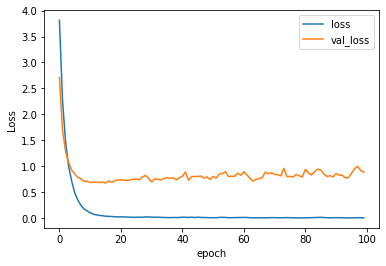

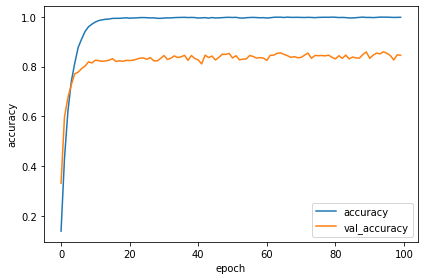

In [ ]:
ve_Acc_Loss(history_model_mobilenet)

In [ ]:
y_pred = finetune_mobilenet.predict(test_images)
y_classes = [np.argmax(element) for element in y_pred]


In [ ]:
img = cv2.imread('/content/nhà thờ đức bà.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (140, 140))
img = np.array([img])
pred = model_mobilenet.predict(img)
pred_classes = [np.argmax(element) for element in pred]
class_names[pred_classes[0]]

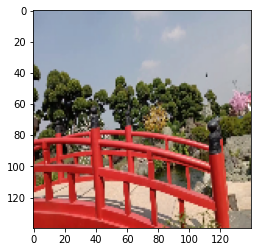

Công viên đá Nhật Rinrin Park


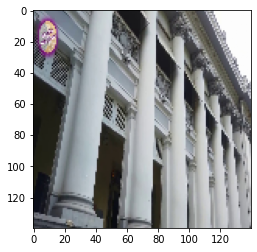

Bảo tàng Thành phố Hồ Chí Minh


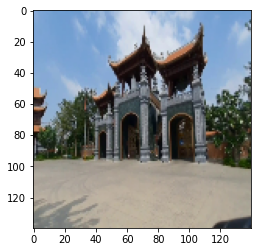

Tu Viện VĨNH NGHIÊM


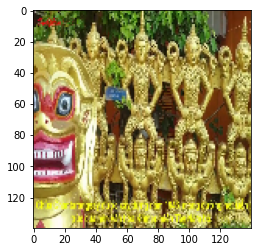

Chùa Chantarangsay(Chùa Khmer)


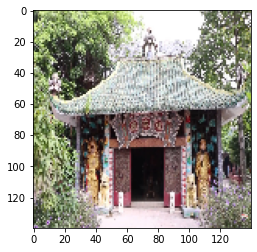

Phù Châu Miếu (Miếu Nổi)


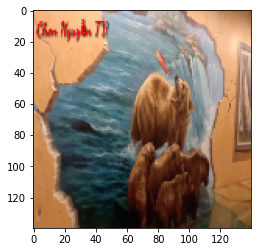

Bảo Tàng Tranh 3D Art In Us


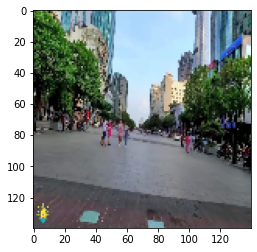

Phố Đi Bộ Nguyễn Huệ


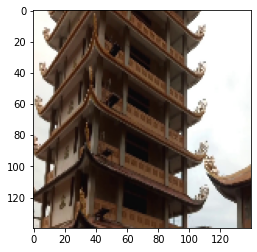

Pháp Viện Minh Đăng Quang


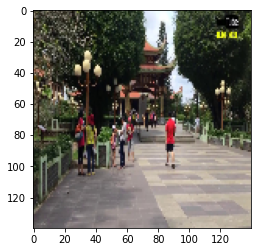

Đền Tưởng Niệm Bến Dược


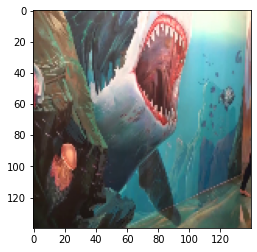

Bảo Tàng Tranh 3D Art In Us


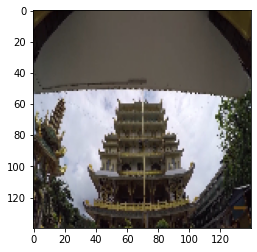

Chùa Vạn Đức


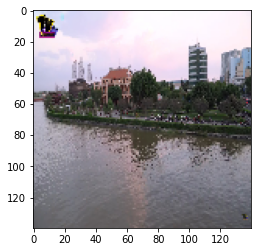

Bến Cảng Nhà Rồng


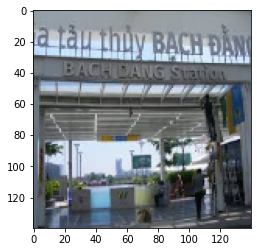

Bến tàu Bạch Đằng


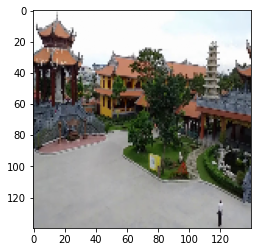

Tu Viện VĨNH NGHIÊM


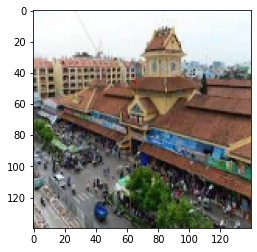

Chợ Lớn (Chợ Bình Tây)


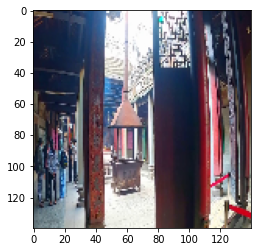

Áo Dài Exhibition


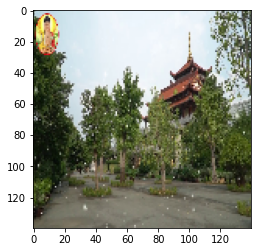

Chùa Huê Nghiêm Q2


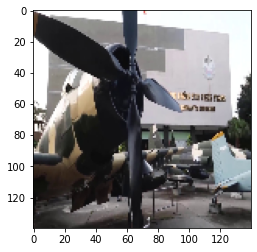

Bảo tàng Chứng tích Chiến tranh TPHCM


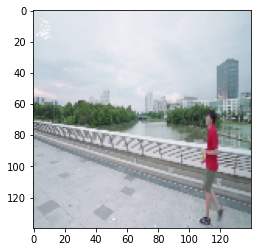

Cầu Ánh Sao Sài Gòn


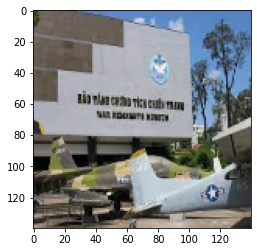

Bảo tàng Chứng tích Chiến tranh TPHCM


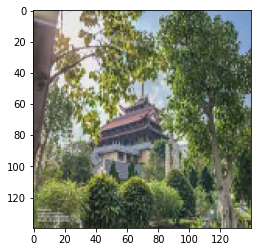

Chùa Bửu Long


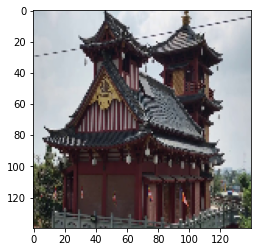

Tu Viện Khánh An


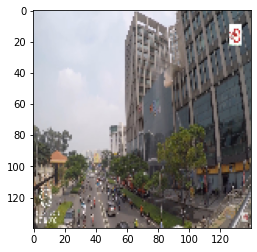

Phố Đi Bộ Nguyễn Huệ


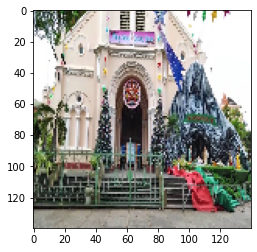

Nhà thờ Chợ Quán


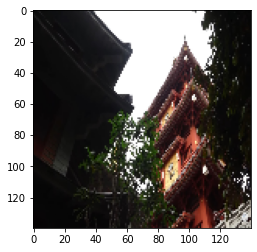

Chùa Vạn Đức


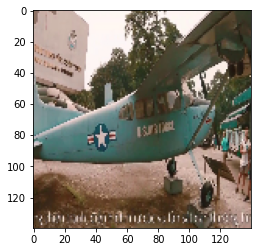

Bảo tàng Chứng tích Chiến tranh TPHCM


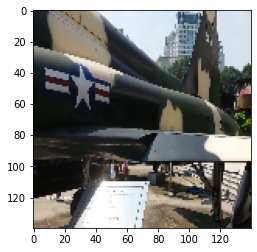

Bảo tàng Chứng tích Chiến tranh TPHCM


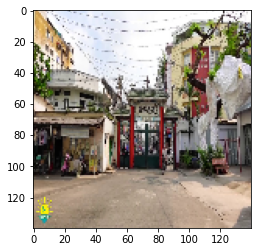

Nhà Thờ Cha Tam


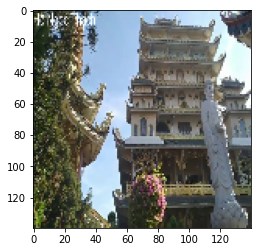

Chùa Vạn Đức


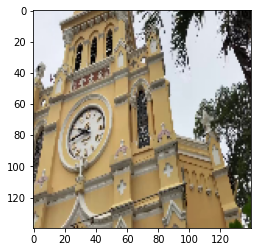

Nhà Thờ Cha Tam


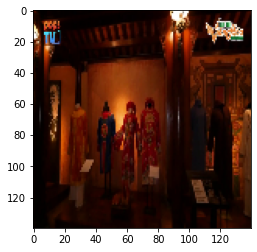

Áo Dài Exhibition


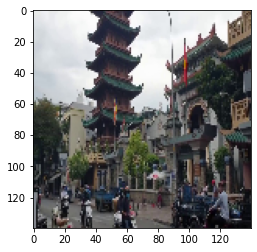

Chùa Ấn Quang


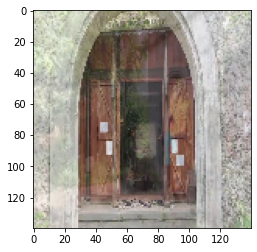

Chùa Bà Thiên Hậu Sài Gòn


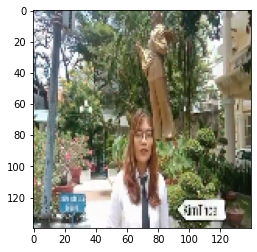

Bảo tàng Phụ Nữ Nam Bộ


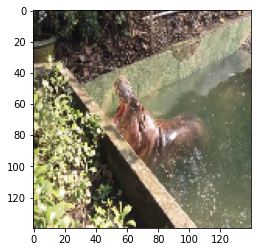

Thảo Cầm Viên SG


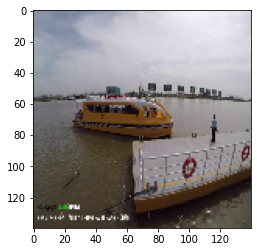

Bến tàu Bạch Đằng


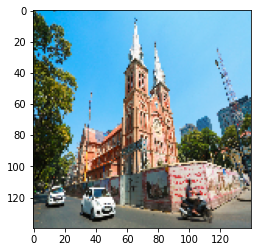

Nhà Thờ Đức Bà


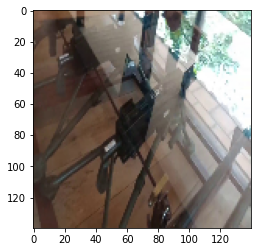

Bến tàu Bạch Đằng


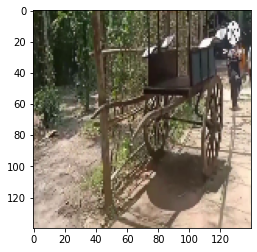

Địa đạo Củ Chi


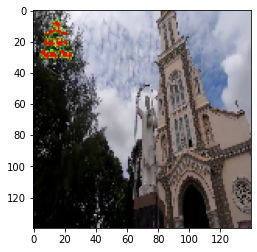

Nhà thờ Huyện Sĩ


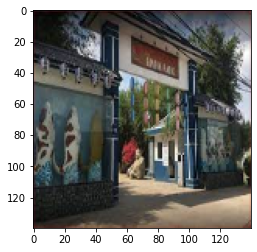

Bảo Tàng Tranh 3D Art In Us


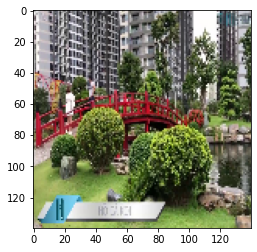

công viên Vinhomes Central Park


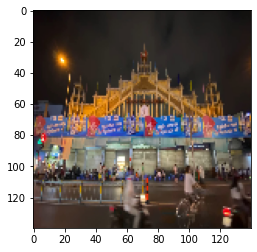

Chợ Tân Định


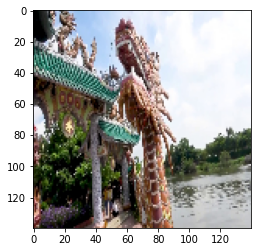

Phù Châu Miếu (Miếu Nổi)


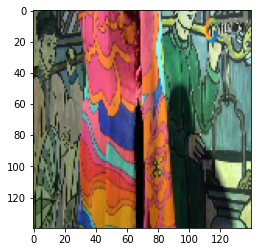

Áo Dài Exhibition


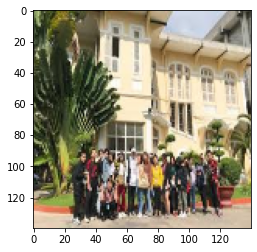

Bảo tàng Phụ Nữ Nam Bộ


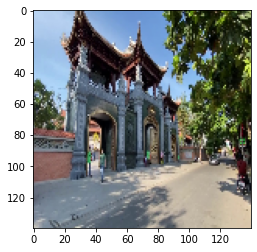

Tu Viện VĨNH NGHIÊM


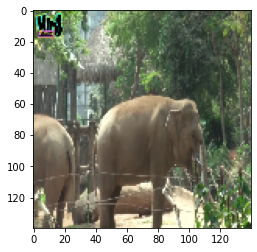

Thảo Cầm Viên SG


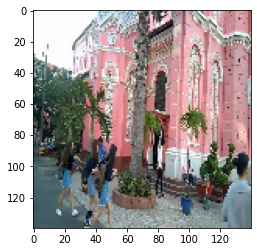

Nhà Thờ Tân Định


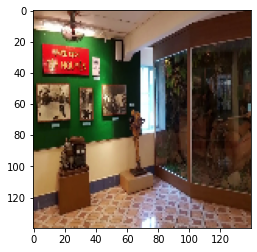

Bảo tàng Chiến dịch Hồ Chí Minh


In [ ]:
predictions = model_mobilenet.predict(test_images[:50])
for i in range(0, 50):
    prediction = [np.argmax(element) for element in pred]
    label = class_names[y_classes[i]]
    plt.imshow(test_images[i])
    plt.show()
    print(label)

In [ ]:
from keras import models
finetune_mobilenet=models.load_model('/content/drive/MyDrive/Model/MobileNet_Final_KLTN.h5')

In [ ]:
y_hat = finetune_mobilenet.predict(test_images)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(test_labels, axis=1)


# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(test_labels, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

Accuracy: 0.824242
Precision: 0.826312
Recall: 0.815243
F1 score: 0.813849
ROC AUC: 0.990680
[[15  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 29]]


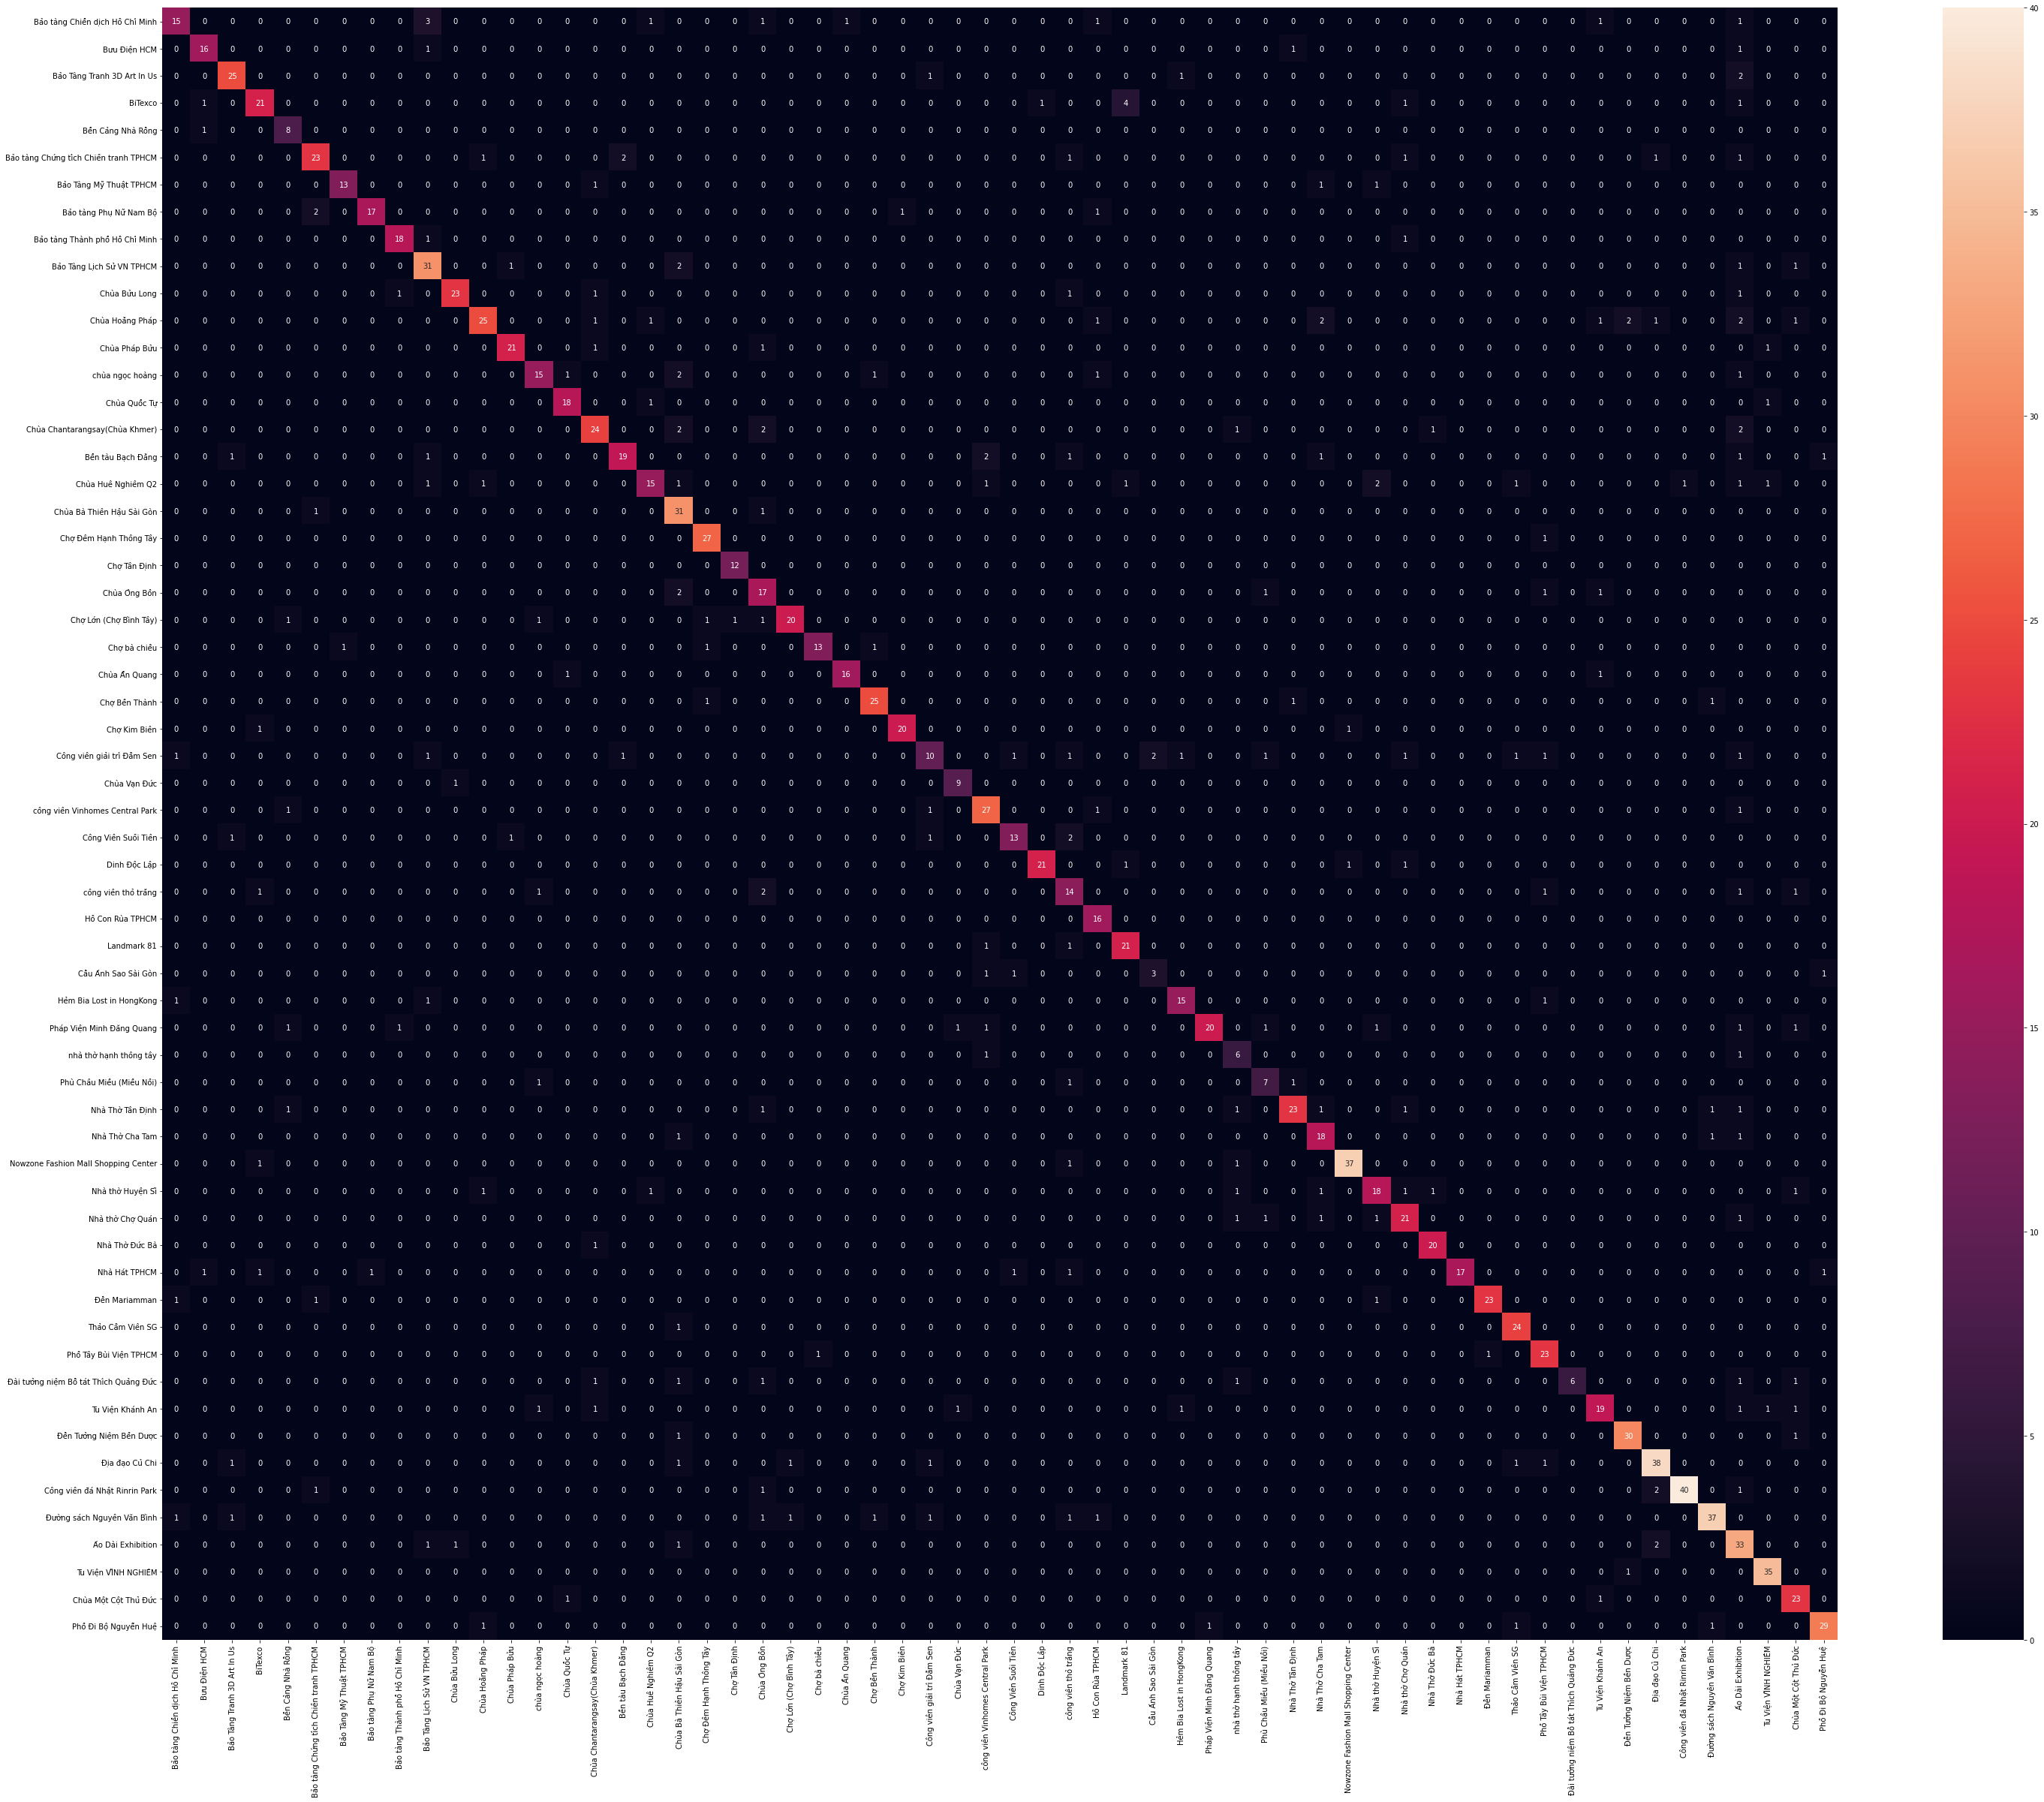

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(matrix, index = [i for i in  class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (50,40))
sn.heatmap(df_cm, annot=True)

In [ ]:

import tensorflow as tf

# Load model như bình thường
model = tf.keras.models.load_model('/content/drive/MyDrive/Model/MobileNet_Final_KLTN.h5')

# Khởi tạo một bộ converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Thực hiện convert
tflite_model = converter.convert()

# Write vào file
open("/content/drive/MyDrive/Model/model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpvtdqvpf4/assets


13911496